In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../utils/')
from preprocessing import preprocess_cosumo
#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import datetime as dt

In [2]:
df = pd.read_csv('../data/consumo_material_clean_with_category.csv', parse_dates=['FECHAPEDIDO'])
df = preprocess_cosumo(df)[['STACKS_COMPRATS','FECHAPEDIDO']]
df_train = df[df['FECHAPEDIDO']<dt.datetime(year=2023,month=1,day=1)]
df_test = df[df['FECHAPEDIDO']>=dt.datetime(year=2023,month=1,day=1)]

asjfkjdsfljds


In [4]:
df_train

,STACKS_COMPRATS,FECHAPEDIDO
1,4,2016-01-02
2,4,2016-01-02
3,2,2016-01-02
4,1,2017-01-02
5,8,2017-01-02
...,...,...
15673,61,2022-10-31
15674,42,2022-10-31
15675,4,2022-10-31
15676,4,2022-10-31


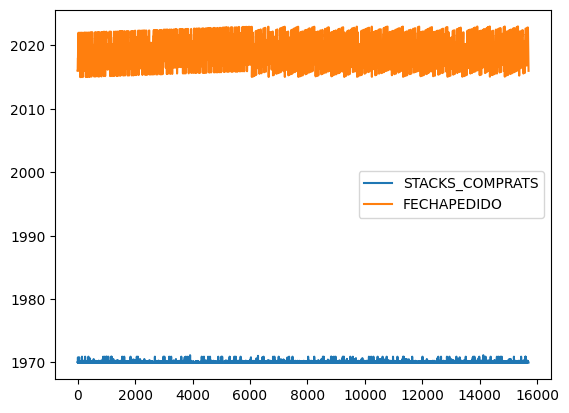

In [6]:
# Plot the time series data
df_train.plot()
plt.show()

In [8]:
df_train.dtypes

STACKS_COMPRATS             int64
FECHAPEDIDO        datetime64[ns]
dtype: object

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


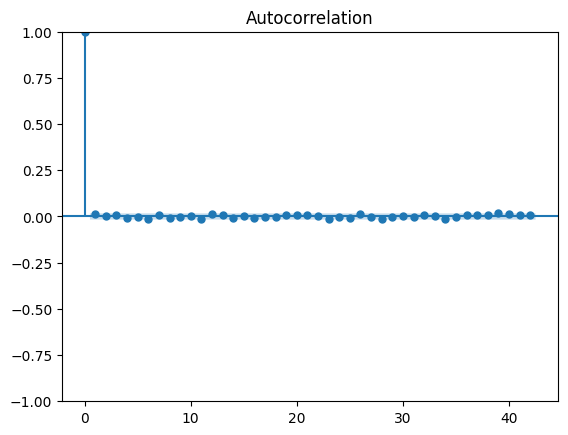

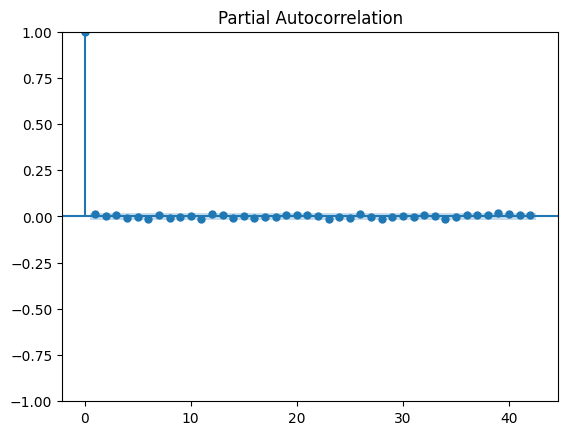

In [30]:
# Check for stationarity
# For ARIMA, the data should be stationary or made stationary
# Stationarity can be checked using ACF and PACF plots
plot_acf(df_train['STACKS_COMPRATS'])
# els punts creuen la linia al cap de 2
q = 1
plot_pacf(df_train['STACKS_COMPRATS'])
p = 2
d = 1
plt.show()
# p q i d han estat triats un pel xd

In [22]:
df_train

,STACKS_COMPRATS,FECHAPEDIDO
1,4,2016-01-02
2,4,2016-01-02
3,2,2016-01-02
4,1,2017-01-02
5,8,2017-01-02
...,...,...
15673,61,2022-10-31
15674,42,2022-10-31
15675,4,2022-10-31
15676,4,2022-10-31


In [24]:
# sort by date
df_train = df_train.sort_values(by='FECHAPEDIDO')

In [25]:
model = ARIMA(df_train['STACKS_COMPRATS'], order=(p, d, q))
arima_model = model.fit()

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\berna\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\berna\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
forecast_steps = 365  # Change this according to how many future steps you want to forecast
forecast = arima_model.forecast(steps=forecast_steps)

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
np.std(forecast)

0.009852411706095764